<p> <br> <p> <br>  <p> <br>  <p>
<hr>
# Κεφάλαιο 6
<hr>
<p> <br> <p> <br>  <p> <br>  <p>

# 6. Συμβολική κι αριθμητική επίλυση εξισώσεων κι ανισώσεων

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Πολλά προβλήματα των μαθηματικών ανάγονται στην επίλυση ενός συστήματος εξισώσεων οι οποίες μπορεί να είναι αλγεβρικές, υπερβατικές, διαφορικές, ολοκληρωτικές κτλ. Σε αυτό το κεφάλαιο θα μελετήσουμε την επίλυση συστημάτων μη-γραμμικών αλγεβρικών και υπερβατικών εξισώσεων με την βοήθεια του Sage, τόσο συμβολικά όσο και αριθμητικά.

</p>

## 6.1 Συμβολική επίλυση εξισώσεων

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Ας θεωρήσουμε μια απλή τριγωνομετρική εξίσωση της μορφής
$$ \sin x= \cos x$$
και ας ζητήσουμε από το Sage να μας λύσει την εξίσωση ως προς $x$
</p>

In [1]:
eq = sin(x)-cos(x)==0
print solve(eq,x)

[
sin(x) == cos(x)
]


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Το αποτέλεσμα δεν είναι και τόσο διαφωτιστικό αφού το Sage μας επέστρεψε την εξίσωση που θέλουμε να επιλύσουμε. Ας δούμε πιo προσεκτικά ποιά συστήματα χρησιμοποιεί το Sage για την επίλυση εξισώσεων 
</p>

In [2]:
from sage.misc.citation import get_systems
print get_systems('solve(x^2-x==0,x)')

['ginac', 'Maxima']


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Συνεπώς για επίλυση εξισώσεων το Sage χρησιμοποιεί το Maxima. Από την βοήθεια για την εντολή <code>solve</code> παρατηρούμε ότι υπάρχουν διαθέσιμες κάποιες επιλογές όταν θέλουμε να λύσουμε εξισώσεις με πολλές ρίζες, όπως οι τριγωνομετρικές εξισώσεις. Η επιλογή που μας προτρέπει να χρησιμοποιήσουμε το Sage είναι <code>to_poly_solve = 'force'</code> 

</p>

In [3]:
print solve(eq,x,to_poly_solve='force')

[x == -3/4*pi + 2*pi*z38, x == 1/4*pi + 2*pi*z40]


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Το αποτέλεσμα εμφανίζει δυο ελεύθερες μεταβλητές οι οποίες προέκυψαν από την διαδικασία επίλυσης που εκτελεί το Maxima. Το όνομά τους αρχίζει με το γράμμα <code>z</code> που σημαίνει ότι πρόκειται για μεταβλητές που διατρέχουν το σύνολο  $\mathbb{Z}$ των ακεραίων. Οπότε οι λύσεις που μας δίνει το Sage είναι <br><br>
$$x=-\frac{3\,\pi}{4} + 2\,k\,\pi \,, \qquad x=\frac{\pi}{4} + 2\,k\,\pi \,,\qquad k\in \mathbb{Z}\,,$$<br>
όπου τα πολλαπλάσια του $\pi$ είναι άρτια. Όμως παρατηρούμε ότι μπορούμε να γράψουμε και τις δυο λύσεις σε μία γιατί <br><br>
$$x=-\frac{3\,\pi}{4} + 2\,k\,\pi = \frac{\pi}{4} - \pi +2\,k\,\pi = \frac{\pi}{4} +(2\,k-1)\,\pi \,.$$ <br>
Οπότε, ουσιαστικά το αποτέλεσμα που μας δίνει το Sage είναι <br><br>
$$ x= \frac{\pi}{4} + k\,\pi \,,\qquad k\in \mathbb{Z} \,, $$
όπου αν το $k$ είναι άρτιος έχουμε την δεύτερη λύση, ενώ αν το $k$ είναι περιττός έχουμε την πρώτη λύση. Το αποτέλεσμα μπορούμε να το ελέγξουμε άμεσα δίνοντας
</p>

In [4]:
var('k'); assume(k,'integer');
print eq(x = pi/4 + k*pi).trig_expand();
forget(k,'integer')

0 == 0


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Με παρόμοιο τρόπο το Sage επιλύει συμβολικά συστήματα εξισώσεων. Για παράδειγμα
</p>

In [5]:
var('x y')
print solve([cos(x)*sin(y) == 0, x + y==0],x,y,to_poly_solve='force')

[
[x == 1/2*pi + pi*z43, y == -1/2*pi - pi*z43],
[x == -pi*z44, y == pi*z44]
]


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
όπου και πάλι οι ελεύθερες μεταβλητές διατρέχουν το σύνολο $\mathbb{Z}$ των ακεραίων, γιατί το όνομά τους αρχίζει από <code>z</code>. Ας επιλύσουμε το ακόλουθο σύστημα εξισώσεων 
</p>

In [6]:
var('x y')
print solve([x+y == 3, 2*x+2*y == 6],x,y)

[
[x == -r3 + 3, y == r3]
]


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Εδώ η ελεύθερη μεταβλητή διατρέχει το σύνολο $\mathbb{R}$ των πραγματικών αριθμών, αφού το όνομά της αρχίζει από <code>r</code>. Όταν είναι εφικτό, το Sage επιλύει συμβολικά, δηλαδή ακριβώς, και συστήματα εξισώσεων όπου τις εξισώσεις τις δηλώνουμε σε λίστα. Για παράδειγμα 
</p>


In [7]:
var('x y' )
print solve([sqrt(x) + sqrt(y) == 5, x + y == 10], x, y)

[
[x == -5/2*I*sqrt(5) + 5, y == 5/2*I*sqrt(5) + 5],
[x == 5/2*I*sqrt(5) + 5, y == -5/2*I*sqrt(5) + 5]
]


## 6.2 Αριθμητική επίλυση εξισώσεων

### 6.2.1 Βαθμωτές υπερβατικές εξισώσεις

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Ας θεωρήσουμε την εξίσωση <br><br>
$$ \sin x + x\, \cos x =0\,,$$ <br>
και ας ζητήσουμε από το Sage να μας λύσει την εξίσωση ως προς $x$
</p>

In [8]:
var('x')
eq = sin(x) + x*cos(x) == 0
print solve(eq,x)

[
x == -sin(x)/cos(x)
]


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Το αποτέλεσμα δεν είναι αυτό που περιμέναμε. Το Sage διαίρεσε(!) με το $\cos x$ και μας επέστρεψε ουσιαστικά την ίδια εξίσωση της οποίας θέλουμε να βρούμε τις ρίζες. Με μια δεύτερη σκέψη, το αποτέλεσμα δεν πρέπει να μας δημιουργεί και τόσο μεγάλη εντύπωση αφού δεν αναμένουμε να υπάρχει κλειστός τύπος που να μας δίνει τις ρίζες της εξίσωσης.<br>
Όμως, το αποτέλεσμα όπως μας το επιστρέφει το Sage μας δίνει την εξής ιδέα. Οι ρίζες της εξίσωσης είναι τα σημεία τομής του γραφήματος της συνάρτησης $y=-\tan x$ με την ευθεία $y=x$. Προτού κάνουμε μια γραφική παράσταση και των δυο συναρτήσεων ας βεβαιωθούμε ότι τα σημεία που μηδενίζεται η $\cos x$ δεν είναι ρίζες της εξίσωσής μας.
</p>

In [9]:
r = solve(cos(x)==0,x,to_poly_solve='force'); print r

[x == 1/2*pi + pi*z58]


In [10]:
var('k')
assume(k,'integer')
assume(k,'odd')
print eq(x=1/2*pi+k*pi).lhs().trig_expand()
forget(k,'odd'); assume(k,'even')
print eq(x=1/2*pi+k*pi).lhs().trig_expand()
forget(k,'even'); forget(k,'integer');

-1
1


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Πράγματι, αν $k$ είναι περιττός το αριστερό μέλος της εξίσωσης είναι -1, ενώ αν $k$ άρτιος το αριστερό μέλος της εξίσωσης είναι 1. Οπότε δεν χάνουμε ρίζες διαιρώντας την εξίσωσή μας με $\cos x$. Ας δούμε τώρα μαζί τα γραφήματα των συναρτήσεων $y=-\tan x$, και της ευθείας $y=x$.
</p>

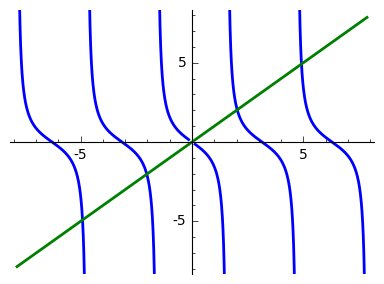

In [11]:
ef = plot(-tan(x), (x,-3*pi+pi/2, 3*pi-pi/2), ymin=-8, ymax=8, detect_poles = True ,thickness=2); 
line = plot(x , (x,-3*pi+pi/2, 3*pi-pi/2), ymin=-8, ymax=8, color = 'green' ,thickness=2) 
(ef+line).show(figsize=4)

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Από το σχήμα παρατηρούμε ότι σε κάθε υποδιάστημα του πεδίου ορισμού της $y=-\tan x$, δηλαδή σε κάθε ανοιχτό διάστημα της μορφής $(-\frac{\pi}{2}+k\,\pi\,,\,\frac{\pi}{2}+k\,\pi)$, το γράφημα της $y=x$ τέμνει το γράφημα της $y=-\tan x$, σε ένα και μόνο ένα σημείο. Το θέμα είναι τώρα να εντοπίσουμε τα σημεία αυτά, αριθμητικά, αφού συμβολικά αυτό δεν είναι εφικτό. Η εντολή για την αριθμητική επίλυση μιας εξίσωσης στο Sage είναι η <strong><code>find_root</code></strong>. Ας δούμε ποιά συστήματα χρησιμοποιεί το Sage για την αριθμητική επίλυση εξισώσεων.
</p> 

In [12]:
from sage.misc.citation import get_systems
print get_systems('find_root(x, -1 , 1)')

['numpy', 'ginac', 'scipy']


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Το Sage για την αριθμητική εύρεση των ριζών μιας συνάρτησης χρησιμοποιεί το <strong><code>ΝumPy</code></strong> και το <strong><code>SciPy</code></strong>. Πράγματι, εκτελώντας την εντολή <strong><code>find_root??</code></strong> (με διπλό ερωτηματικό!) μας εμφανίζεται ο κώδικας της εντολής <strong><code>find_root</code></strong>, ο οποίος στο τέλος καταλήγει να καλεί έναν αλγόριθμο του <strong><code>SciPy</code></strong> <br> <br>
<code>import scipy.optimize
return scipy.optimize.brentq(f, a, b,
                    full_output=full_output, xtol=xtol, rtol=rtol, maxiter=maxiter)</code>
</p> 

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Οπότε το συμπέρασμα είναι ότι ο αλγόριθμος που χρησιμοποιείται για την αριθμητική εύρεση των ριζών μιας συνάρτησης στο Sage, είναι η κλασική μέθοδο του Brent. Ο αλγόριθμος αυτός συνδυάζει τις μεθόδους της διχοτόμησης, της παρεμβολής και της τετραγωνικής παρεμβολής για τον υπολογισμό της αντίστροφης συνάρτησης της οποίας αναζητούμε τις ρίζες της. Ο αλγόριθμος του Brent είναι μια πολύ δημοφιλής μέθοδος για την εύρεση των ριζών μιας συνάρτησης επειδή είναι ευσταθής, αξιόπιστος και ταχύτατος. Ας δούμε όμως περισσότερες λεπτομέρειες για τον αλγόριθμο του Brent, καλώντας βοήθεια από το <strong><code>SciPy</code></strong> για τον αλγόριθμο 
</p>

In [13]:
from scipy.optimize import brentq

In [ ]:
help(brentq)

<p>
<code>
Help on function brentq in module scipy.optimize.zeros:

brentq(f, a, b, args=(), xtol=1e-12, rtol=4.4408920985006262e-16, maxiter=100, full_output=False, disp=True)
    Find a root of a function in given interval.
    .
    .
    Notes
    -----
    `f` must be continuous.  f(a) and f(b) must have opposite signs.
</code></p>

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Διαβάζοντας προσεχτικά παρατηρούμε ότι για να χρησιμοποιήσουμε την μέθοδο του Brent με αξιοπιστία θα πρέπει: <br> 
<ul> 
<li> α) η συνάρτηση $y=f(x)$ της οποίας αναζητούμε τις ρίζες, να είναι συνεχής στο διάστημα $[a,b]$, και</li> 
<li> β) οι τιμές $f(a)$, $f(b)$ στα άκρα του διαστήματος, να είναι ετερόσημες.</li>
</ul> <br>
Οπότε τίθεται το ερώτημα, ποιά $f(x)$ θα πάρουμε για να εξασφαλίσουμε την σύγκλιση της μεθόδου αριθμητικά; Μετά από λίγη σκέψη, θα πάρουμε την αρχική μας συνάρτηση $f(x)=\sin x + x\, \cos x$, η οποία είναι συνεχής σε όλο το πεδίο οριμού της δηλαδή το $\mathbb{R}$, και ως διαστήματα θα πάρουμε διαστήματα της μορφής $[-\frac{\pi}{2}+k\,\pi\,,\,\frac{\pi}{2}+k\,\pi]$, στα οποία γνωρίζουμε ότι σε κάθε ένα από αυτά υπάρχει μία και μόνο μία ρίζα της εξίσωσης $f(x)=0$. <br> 
Είναι όμως ετερόσημες οι τιμές της συνάρτησης  $\,\,f(x)=\sin x+x\,\cos x$, στα άκρα των παραπάνω διαστημάτων $[a,b]$;
</p> 

In [14]:
f = sin(x)+x*cos(x)
var('k')
assume(k,'odd'); 
print str('αν k άρτιος:');
print str('f(a)='), f(x=-pi/2 + k*pi).trig_expand() , str('f(b)='), f(x=pi/2 + k*pi).trig_expand()
forget(); assume(k,'even');
print str('αν k περιττός:');
print str('f(a)='), f(x=-pi/2 + k*pi).trig_expand() , str('f(b)='), f(x=pi/2 + k*pi).trig_expand()
forget()

αν k άρτιος:
f(a)= 1 f(b)= -1
αν k περιττός:
f(a)= -1 f(b)= 1


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Οπότε, εξασφαλίζονται όλες οι προϋποθέσεις για την επιτυχή εφαρμογή του αλγόριθμου Brent για να βρούμε τις ρίζες της $f(x)$. Με την παρακάτω εντολή βρίσκουμε τις πέντε ρίζες στα αντίστοιχα πέντε διαστήματα της μορφής $[-\frac{\pi}{2}+k\,\pi\,,\,\frac{\pi}{2}+k\,\pi]$ με $k=-2,-1,0,1,2$,  και τα τοποθετούμε σε μια λίστα με όνομα <code>w</code>
</p>

In [15]:
w=[]
for k in [-2..2]: 
    root = find_root(f, -pi/2 + k*pi , pi/2 + k*pi)
    w.append(root)
print w

[-4.913180439434884, -2.028757838110434, 0.0, 2.028757838110434, 4.913180439434884]


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Προφανώς, με ανάλογο τρόπο μπορούμε να εντοπίσουμε και τις ρίζες που βρίσκονται στα υπόλοιπα διαστήματα. Για παράδειγμα, ας πάμε στο διάστημα $[-\frac{\pi}{2}+k\,\pi\,,\,\frac{\pi}{2}+k\,\pi]$, με $k=10000$.
</p> 

In [16]:
j = 10000
root = find_root(f, -pi/2 + j*pi , pi/2 + j*pi,full_output=True)
print root

(31414.355771403716,       converged: True
           flag: 'converged'
 function_calls: 6
     iterations: 5
           root: 31414.355771403716)


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Tέλος, ας απεικονίσουμε γραφικά τα αποτελέσματά μας στην αρχική γεωμετρική εικόνα των ριζών ως σημεία τομής του γραφήματος της $y=-\tan x$ με την ευθεία $y=x$.
</p>

In [17]:
pp=list([ ( w[i] , w[i] ) for i in [0..(len(w)-1)]])

In [18]:
pp_plot=scatter_plot(pp, facecolor='red', marker='o', markersize=30)

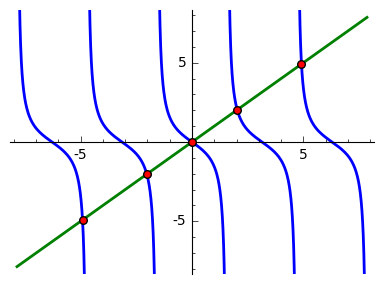

In [19]:
(ef+line+pp_plot).show(figsize=4)

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Αν εφαρμόζαμε την μέθοδο αριθμητικής εύρεσης των ριζών στην συνάρτηση $g(x)=-\tan x-x$, ο αλγόριθμος θα αποτύγχανε. Ο λόγος είναι ότι δεν υπάρχουν οι τιμές της $g(x)$ στα άκρα των διαστημάτων $[-\frac{\pi}{2}+k\,\pi\,,\,\frac{\pi}{2}+k\,\pi]$, αφού η $g(x)$ δεν ορίζεται στα σημεία αυτά. Επιπλέον, δεν μπορούμε να αποφανθούμε ούτε για το πρόσημο της $g(x)$ στα άκρα των διαστημάτων αφού ούτε τα όρια υπάρχουν εκεί. Για παράδειγμα, στο $x=\frac{\pi}{2}$ τα πλευρικά όρια της $g(x)$ είναι
</p>

In [20]:
g = -tan(x) - x;
print g.limit(x=pi/2,dir = '+');
print g.limit(x=pi/2,dir = '-');

+Infinity
-Infinity


In [21]:
brentq(g, pi/2, 3*pi/2 , full_output=true)

/home/tasos/sage-7.5.1/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:1: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  from ipykernel.kernelapp import IPKernelApp


ValueError: f(a) and f(b) must have different signs

### 6.2.2 Συστήματα υπερβατικών εξισώσεων

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Προς το παρόν στο Sage δεν έχει υλοποιηθεί ακόμη (version 7.5.1) κάποια εντολή για την αριθμητική επίλυση συστημάτων υπερβατικών εξισώσεων. Όμως,  για τον σκοπό αυτό μπορούμε να χρησιμοποιήσουμε αλγόριθμους που είναι διαθέσιμοι στο <strong><code>SciPy</code></strong> σε συνδυασμό με το <strong><code>NumPy</code></strong>. Ορισμένοι αλγόριθμοι χρησιμοποιούν τον Ιακωβιανό πίνακα των συναρτήσεων που ορίζουν το σύστημα που θέλουμε να επιλύσουμε οπότε πριν καλέσουμε τις εντολές από τα <strong><code>SciPy</code></strong>, <strong><code>NumPy</code></strong> μπορούμε να υπολογίσουμε τον πίνακα αυτό συμβολικά από το Sage και να απεικονίσουμε τουλάχιστον γραφικά την λύση των εξισώσεων.
</p>

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Για παράδειγμα, ας υποθέσουμε ότι θέλουμε να επιλύσουμε το εξής σύστημα εξισώσεων <br> <br>
$$ f(x,y) := e^x + y-4=0\,, \qquad g(x,y) := e^y - x  =0 \,, \qquad x,y\in \mathbb{R}\,. $$ <br>
Ας ορίσουμε τις συναρτήσεις αυτές στο Sage
</p>

In [22]:
var('x y')
f = exp(x)+y-4; 
g = exp(y)-x;
print f; print g

y + e^x - 4
-x + e^y


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Για να απεικονίσουμε γραφικά το(α) σημείο(α) (αν υπάρχουν) που τέμνονται οι καμπύλες $f(x,y)=0$ και $g(x,y)=0$, χρησιμοποιούμε την εντολή <strong><code>contour_plot</code></strong> και από όλες τις ισοσταθμικές καμπύλες $f(x,y)=c_1$ και $g(x,y)=c_2$ επιλέγουμε εκείνες για τις οποίες ισχύει $c_1=c_2=0$.
</p>

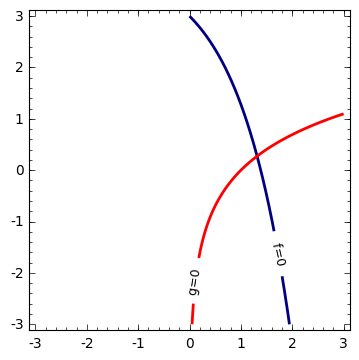

In [23]:
cf = contour_plot(f, (x,-3,3), (y,-3,3), contours=[0], fill=False, labels=True,cmap='jet', label_inline=True,
label_fmt={0:" f=0 "}, label_colors='black',linewidths=2)
cg = contour_plot(g, (x,-3,3), (y,-3,3), contours=[0], fill=False, labels=True,cmap='autumn', label_inline=True,
                  label_fmt={0:" g=0 "}, label_colors='black',linewidths=2)
(cf+cg).show(figsize=5)

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Παρατηρούμε ότι στο τετράγωνο $S=[-3,3]\times[-3,3]$ υπάρχει ένα σημείο τομής των καμπυλών $f(x,y)=0$, $g(x,y)=0$ και μάλιστα το σημείο αυτό είναι μοναδικό στο $S$. Οπότε, αν ο αλγόριθμος που θα χρησιμοποιήσουμε συγκλίνει και πάρουμε αρχική προσέγγιση κοντά στην μοναδική ρίζα, ο αλγόριθμος μάλλον θα συγκλίνει στην μοναδική ρίζα στο $S$. <br>
Ορισμένοι αλγόριθμοι του <strong><code>SciPy</code></strong> χρησιμοποιούν τον Ιακωβιανό πίνακα $J(f,g;x,y)$, οπότε το Sage μπορεί να μας βοηθήσει να υπολογίσουμε συμβολικά τον πίνακα $J(f,g;x,y)$ και να τον περάσουμε ακριβώς στους αλγόριθμους αυτούς, αντί ο αντίστοιχος αλγόριθμος του <strong><code>SciPy</code></strong> να τον υπολογίσει προσεγγιστικά. Επίσης, επειδή το <strong><code>SciPy</code></strong> χρησιμοποιεί την Python, πρέπει να μετατρέψουμε τις συναρτήσεις $(f,g)$ και τον πίνακα $J$ σε ανάλογο συμβολισμό. Αυτά υλοποιούνται στις παρακάτω εντολές οι οποίες καταλήγουν στην εύρεση της αριθμητικής τιμής της ρίζας που ψάχνουμε.
</p>

In [24]:
F = (f,g)
print jacobian(F,(x,y))

[e^x   1]
[ -1 e^y]


In [25]:
import numpy as np
from scipy import optimize

In [26]:
def fun(x): 
    return [ exp(x[0]) + x[1] - 4.0, exp(x[1])-x[0] ]

In [27]:
def jac(x):
    return np.array([[ exp(x[0]) ,  1.0], 
                     [ -1.0      ,  exp(x[1])]])

In [28]:
sol = optimize.root(fun, [1, 1] , jac = jac , method='hybr'); print sol.x

[ 1.31531486  0.27407607]


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Η αρχική εκτίμηση της ρίζας που δώσαμε ήταν το σημείο $(1,1)$, και ο αλγόριθμος που χρησιμοποιήσαμε είναι η <code>hybr</code> (μια τροποποιημένη μεθόδος του αλγόριθμου του Powell όπως μας πληροφορεί στην σχετική βοήθεια το <strong><code>SciPy</code></strong>). Την αριθμητική τιμή της λύσης που μας έδωσε το <strong><code>SciPy</code></strong> μπορούμε να την καταχωρίσουμε στο Sage για περαιτέρω μελέτη. Για παράδειγμα 
</p>

In [29]:
x0 = sol.x[0]; y0 = sol.x[1]; print str('x0='), x0 ; print str('y0='), y0 ;

x0= 1.31531485571
y0= 0.274076070971


In [30]:
print f(x=x0,y=y0);
print g(x=x0,y=y0), 

-2.2248869413488137e-13
-3.028466366572502e-12


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
από όπου συμπεραίνουμε ότι η λύση που βρήκαμε ικανοποιεί και τις δυο εξισώσεις $f(x,y)=0$, $g(x,y)=0$, σχεδόν στην ακρίβεια δεκαδικών ψηφίων κινητής υποδιαστολής που εκτελεί ο υπολογιστής μας. Για διαφορετικούς αλγόριθμους αριθμητικής επίλυσης συστημάτων εξισώσεων με το <strong><code>SciPy</code></strong> παραπέμπουμε τον αναγνώστη στην σχετική βοήθεια.
</p>

In [ ]:
help(optimize.root)

## 6.3 Συστήματα πολυωνυμικών εξισώσεων <br>
### 6.3.1 Βάσεις Gröbner

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Αν το σύστημα των εξισώσεων που θέλουμε να επιλύσουμε απαρτίζεται από πολυώνυμα τότε το Sage μας δίνει την δυνατότητα να βρούμε μια βάση Gröbner. Η κατασκευή μιας βάσης Gröbner για ένα πολυωνυμικό ιδεώδες είναι το μη-γραμμικό ανάλογο της διαδικασίας να φέρουμε ένα σύστημα γραμμικών εξισώσεων σε ανηγμένη κλιμακωτή μορφή. Η ύπαρξη μιας βάσης Gröbner μπορεί να συναχθεί από το λεγόμενο Θεώρημα βάσης του Hilbert. Όμως η εύρεση με ρητό τρόπο μιας βάσης Gröbner μπορεί να είναι ένα αρκετά δύσκολο κι επίπονο εγχείρημα. Ο λεγόμενος αλγόριθμος του Buchberger δίνει την γενική λύση στην κατασκευή μιας βάσης Gröbner από ένα ιδεώδες πολυωνύμων κι έχει υλοποιηθεί στο Sage μέσω της Singular. <br>
Μια συστηματική διαπραγμάτευση των βάσεων Gröbner μας βγάζει πολύ έξω από τους στόχους των σημειώσεων αυτών. Αντί αυτής της διαπραγμάτευσης θα παρουσιάσουμε ένα παράδειγμα από την γεωμετρία που μας δίνει μια εποπτική εικόνα επίλυσης πολυωνυμικών εξισώσεων μέσω της κατασκευής μιας βάσης Gröbner. <br> <br>
Το θεώρημα του Descartes (1643) λέει ότι οι ακτίνες οποιωνδήποτε τεσσάρων κύκλων οι οποίοι εφάπτονται αμοιβαία και οι τέσσερις, ικανοποιεί μια συγκεκριμένη δευτεροβάθμια εξίσωση. Δοσμένων τριών αμοιβαία εφαπτόμενων κύκλων, λύνοντας την δευτεροβάθμια εξίσωση μπορούμε να κατασκευάσουμε τον τέταρτο κύκλο. <br> <br>

Είναι γνωστό από την Αναλυτική Γεωμετρία ότι δυο κύκλοι $(O_1(x_1,y_1),r_1)$ και $(Ο_2(x_2,y_2),r_2)$ με κέντρα $O_1$, $O_2$ και ακτίνες $r_1,r_2$, αντίστοιχα, που εφάπτονται <strong>εξωτερικά</strong> ικανοποιούν την εξίσωση <br><br>
$$ r_1+r_2 = {\overline{O_1O_2}} \quad \Rightarrow \quad r_1+r_2 = \sqrt{(x_1-x_2)^2 + (y_1-y_2^2)}\,.$$
<br><br>
Επιλέγουμε τρια τυχαία σημεία στο επίπεδο εκ των οποίων τα δύο είναι πάνω στο x-άξονα. Επειδή θέλουμε οι κύκλοι που θα έχουν κέντρα τα σημεία αυτά να εφάπτονται εξωτερικά επιλέγουμε τα σημεία αυτά ανάλογα.
</p>

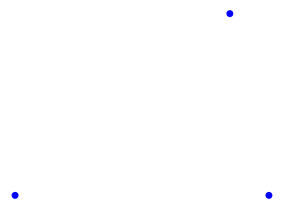

In [73]:
(c1x , c1y) = (RR.random_element(0.5, 1).n(digits=2)  , 0)
(c2x , c2y) = (RR.random_element(-1, -0.5).n(digits=2) , 0)
(c3x , c3y) = (RR.random_element(-1, 1).n(digits=2) , RR.random_element(1, 1.5).n(digits=2))
p1 = point((c1x, c1y), size=25, color='blue')
p2 = point((c2x, c2y), size=25, color='blue')
p3 = point((c3x, c3y), size=25, color='blue')
(p1+p2+p3).show(figsize=3,axes=False)

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Στην συνεχεία καταστρώνουμε τις εξισώσεις που μας δίνουν τις ακτίνες $r_1,r_2,r_3$ των τριών κύκλων, υποθέτοντας ότι αυτοί εφάπτονται αμοιβαία. 
</p>

In [74]:
var('r1 , r2, r3')
eq1 = r1 + r2 == sqrt((c1x-c2x)^2 + (c1y-c2y)^2);
eq2 = r1 + r3 == sqrt((c1x-c3x)^2 + (c1y-c3y)^2);
eq3 = r2 + r3 == sqrt((c2x-c3x)^2 + (c2y-c3y)^2);
sol=solve([eq1,eq2,eq3],[r1,r2,r3],solution_dict=true)

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Το παραπάνω σύστημα είναι ένα γραμμικό σύστημα για τις ακτίνες το οποίο λύνεται εύκολα και καταχωρούμε τις λύσεις στις μεταβλητές των ακτίνων
</p>

In [75]:
rr1 = sol[0][r1];
rr2 = sol[0][r2];
rr3 = sol[0][r3];

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Το αποτέλεσμα είναι οι εξής τρεις αμοιβαία εφαπτόμενοι κύκλοι
</p>

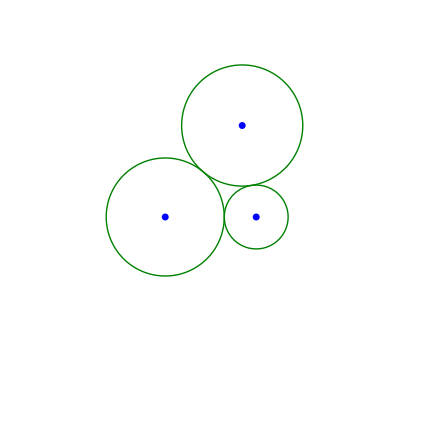

In [76]:
var('x,y')
c1 = implicit_plot((x - c1x)^2 + (y - c1y)^2 - rr1^2, (x, -3, 3), (y, -3, 3), color='green')
c2 = implicit_plot((x - c2x)^2 + (y - c2y)^2 - rr2^2, (x, -3, 3), (y, -3, 3), color='green')
c3 = implicit_plot((x - c3x)^2 + (y - c3y)^2 - rr3^2, (x, -3, 3), (y, -3, 3), color='green')
(p1 + p2 + p3 + c1 + c2 + c3 ).show(figsize=6,frame=False)

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Το πρόβλημα του Descartes, το οποίο αποτελεί ένα περιορισμένο πρόβλημα του Απολλώνιου από την Πέργαμο, είναι να βρούμε έναν τέταρτο κύκλο ο οποίος είναι εφαπτόμενος και στους τρεις δοσμένους αμοιβαία εφαπτόμενους κύκλους. <br><br> Ας ονομάσουμε με $Ο_4(x,y)$ και $r$, το κέντρο και την ακτίνα, αντίστοιχα, του τέταρτου κύκλου. Τότε είναι προφανές ότι για να εφάπτεται ο τέταρτος κύκλος αμοιβαία και στους τρεις άλλους κύκλους θα πρέπει να ισχύει το σύστημα των εξισώσεων <br><br>

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
$$(x - x_1)^2 + (y - y_1)^2 - (r + r_1)^2 =0 \,,$$ <br>
$$(x - x_2)^2 + (y - y_2)^2 - (r + r_2)^2 =0 \,,$$ <br>
$$(x - x_3)^2 + (y - y_3)^2 - (r + r_3)^2 =0 \,.$$ <br>
</p>

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Το παραπάνω πρόκειται για ένα σύστημα τριών πολυωνυμικών εξισώσεων δευτέρου βαθμού για τις τρεις άγνωστες ποσότητες, το κέντρο $(x,y)$ και την ακτίνα $r$ του τέταρτου κύκλου $O_4$. Θα επιλύσουμε το σύστημα αυτό στο Sage κατασκευάζοντας μια βάση Gröbner. Πρώτα απ' όλα σχηματίζουμε συμβολικά το σύστημα των εξισώσεων.
</p>

In [77]:
var('r')
e1 = (x - c1x)^2 + (y - c1y)^2 - (r + rr1)^2
e2 = (x - c2x)^2 + (y - c2y)^2 - (r + rr2)^2
e3 = (x - c3x)^2 + (y - c3y)^2 - (r + rr3)^2
eqs = [e1, e2, e3]

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Στην συνέχεια δημιουργούμε έναν δακτύλιο πολυωνύμων τριών μεταβλητών $(x,y,r)$ με συντελεστές στους ρητούς, με λεξικογραφική διάταξη μονονύμων, και μεταγράφουμε στον δακτύλιο αυτό, τα πολυώνυμα που ορίζουν τις εξισώσεις μας.
</p>

In [78]:
PR.<x,y,r> = PolynomialRing(QQ, order='lex')
print PR
q1 = PR(e1); q2 = PR(e2); q3 = PR(e3)
print q1; 

Multivariate Polynomial Ring in x, y, r over Rational Field
x^2 - 13/11*x + y^2 - r^2 - 9629/10000*r + 5681165439/48400000000


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Κατόπιν, τα πολυώνυμα $q_1,q_2,q_3$ τα θέτουμε σε μια λίστα και ορίζουμε το ιδεώδες των πολυωνύμων για το οποίο θα κατασκευάσουμε μια βάση Gröbner
</p>

In [79]:
qs = [q1, q2, q3]
I = Ideal(qs)
print I

Ideal (x^2 - 13/11*x + y^2 - r^2 - 9629/10000*r + 5681165439/48400000000, x^2 + 64/41*x + y^2 - r^2 - 17793/10000*r - 122589217169/672400000000, x^2 - 19/25*x + y^2 - 80/29*y - r^2 - 18261/10000*r + 408132834239/336400000000) of Multivariate Polynomial Ring in x, y, r over Rational Field


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Με την εντολή <strong><code>groebner_basis()</code></strong> το Sage μας επιστρέφει την βάση Gröbner του $Ι$
</p>

In [80]:
B = I.groebner_basis()
print B

[x - 920491/3092500*r - 3047916797551/27894350000000, y + 826922733/3092500000*r - 334864050819951073/808936150000000000, r^2 + 3021278944676744784109101/1725064554532205538410000*r - 112255335432816194070696394554851329/549613226360582807530016540400000000]


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Παρατηρούμε ότι το τρίτο πολυώνυμο στην λίστα (βάση Gröbner)  που μας έδωσε το Sage είναι δευτέρου βαθμού και αφορά μόνο την μεταβλητή $r$, την ακτίνα του τέταρτου κύκλου. Τα πρώτα δυο πολυώνυμα είναι γραμμικά στις μεταβλητές $x,y,r$. Οπότε λύνοντας την δευτεροβάθμια εξίσωση για το $r$ παίρνουμε δυο λύσεις (ένα εσωτερικό κι έναν εξωτερικό εφαπτόμενο κύκλο) και αντικαταθιστώντας στις δυο πρώτες παίρνουμε τα αντίστοιχα κέντρα των κύκλων. Πραγματικά
</p>

In [81]:
soln = I.variety(RR)

In [82]:
(x1s , y1s , r1s) = (soln[0][x] , soln[0][y] , soln[0][r])
(x2s , y2s , r2s) = (soln[1][x] , soln[1][y] , soln[1][r])

In [83]:
var('x , y')
kyk1=implicit_plot((x-x1s)^2+(y-y1s)^2-r1s^2, (x, -3, 3), (y, -3, 3), color='red')
kyk2=implicit_plot((x-x2s)^2+(y-y2s)^2-r2s^2, (x, -3, 3), (y, -3, 3), color='red')

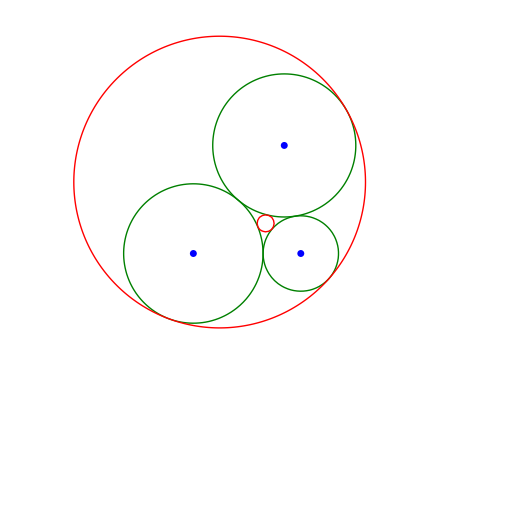

In [84]:
(p1 + p2 + p3 + c1 + c2 + c3 + kyk1 + kyk2).show(figsize=7,frame=False)

### 6.3.2 Απαλείφουσα

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Μια εναλλακτική μέθοδος για την επίλυση πολυωνυμικών εξισώσεων είναι να χρησιμοποιήσουμε την απαλείφουσα, η οποία είναι διαθέσιμη στο Sage μέσω της Singular. Η απαλείφουσα είναι μια ορίζουσα και αποτελεί το μη-γραμμικό ανάλογο της γνωστής μας ορίζουσας για γραμμικά συστήματα εξισώσεων. Πιο συγκεκριμένα. <br><br>
Η απαλείφουσα δυο πολυωνύμων <br>
$$ f = a_m\, x^m + a_{m-1}\,x^{m-1} + \cdots a_0\,,$$ <br>
$$ g = b_n\, x^n + b_{n-1}\,x^{n-1} + \cdots b_0\,,$$ <br>
με $a_m,b_n\neq 0 $, ορίζεται ως η $(m+n)\times (m+n)$ ορίζουσα <br><br>

$$ {\mathrm{Res}}(f,g) = \det 
   \left(\begin{array}{cccccccc} 
   a_m   & a_{m-1} & \cdots  & a_0    & 0      & 0       & \ldots & 0    \\
   0     & a_{m}   & a_{m-1} & \cdots & a_0    & 0       & \ldots & 0    \\
   0     & 0       & \ddots  & \ddots & \cdots & \vdots  & \vdots & 0    \\
   0     & 0       & \cdots  & 0      & a_m    & a_{m-1} & \ldots & a_0  \\
   b_n   & b_{n-1} & \cdots  & b_0    & 0      & 0       & \ldots & 0    \\
   0     & b_{n}   & b_{n-1} & \cdots & b_0    & 0       & \ldots & 0    \\
   0     & 0       & \ddots  & \ddots & \cdots & \vdots  & \vdots & 0    \\
   0     & 0       & \cdots  & 0      & b_n    & b_{n-1} & \cdots & b_0  \\
\end{array} \right)$$<br>
Οι πρώτες $n$-γραμμές αφορούν τους συντελεστές $a_i$, και οι τελευταίες $m$-γραμμές αφορούν τα $b_i$. Καλείται ορισμένες φορές και ως απαλείφουσα του Sylvester. <br>
Για παράδειγμα, στο Sage η απαλείφουσα των πολυωνύμων <br><br>
$$ f(x) = a\,x^2 + b\,x+c\,,\qquad g(x)=d\,x+e\,, $$<br>
υπολογίζεται από την ορίζουσα του παραπάνω πίνακα Sylvester, ο οποίος παράγεται χρησιμοποιώντας την Singular για να δηλώσουμε ένα δακτύλιο πολυωνύμων
και με την εντολή <code>.sylvester_matrix()</code>. Συγκεκριμένα,
</p>

In [85]:
PR.<x,a,b,c,d,e> = PolynomialRing(QQ)
print PR
f = a*x^2 + b*x  + c
g = d*x + e
print type(f), type(g)

Multivariate Polynomial Ring in x, a, b, c, d, e over Rational Field
<type 'sage.rings.polynomial.multi_polynomial_libsingular.MPolynomial_libsingular'> <type 'sage.rings.polynomial.multi_polynomial_libsingular.MPolynomial_libsingular'>


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Παρατηρούμε ότι και τα δυο πολυώνυμα $f$ και $g$ έχουν τύπο <code>MPolynomial_libsingular</code>. 
</p>

In [86]:
Res_x = f.sylvester_matrix(g, x)
print Res_x
print Res_x.det()

[a b c]
[d e 0]
[0 d e]
c*d^2 - b*d*e + a*e^2


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Τα βασικά θεωρήματα σχετικά για την απαλείφουσα είναι:
<ul> 
<li>
Δυο μη-σταθερά πολυώνυμα $f,g$ έχουν έναν κοινό παράγοντα αν και μόνο αν ${\mathrm{Res}}(f,g)=0$.  </li> <br>
<li> Η απαλείφουσα ${\mathrm{Res}}(f,g)$ είναι ανάγωγο πολυώνυμο στον δακτύλιο $k[a_0,\ldots,a_m,b_0,\ldots,b_n]$ των πολυωνυμικών εκφράσεων στα $a_i,b_i$, όταν αυτά θεωρηθούν ως ανεξάρτητες μεταβλητές. <br><br> Για παράδειγμα, όπως διαπιστώσαμε πιο πάνω η απαλείφουσα των πολυωνύμων $ f(x) = a\,x^2 + b\,x+c$, και $g(x)=d\,x+e\,, $ είναι $a\,e^2 - b\,d\,e + c\,d^2 $. Το τελευταίο είναι ένα πολυώνυμο πέντε μεταβλητών στον δακτύλιο $k[a,b,c,d,e]$, με συντελεστές σε οποιοδήποτε σώμα $K$. Αυτό που λέει το θεώρημα είναι ότι το πολυώνυμο $a\,e^2 - b\,d\,e + c\,d^2 $ είναι ανάγωγο στο $Κ$ (επομένως και στο $k[a,b,c,d,e]$).  </li> <br>
<li> Αν $I=< f,g >\subset k[x,a_0,\ldots,a_m,b_0,\ldots,b_n]$ είναι το ιδεώδες που παράγεται από τα πολυώνυμα $f,g$ τότε 
$I\cap  k[x,a_0,\ldots,a_m,b_0,\ldots,b_n] = < {\mathrm{Res}}(f,g) >.$ ( Ισχύει παρόμοια παρατήρηση όπως πιο πάνω.)
</ul> <br>
Ας δούμε πως μπορούμε να επιλύσουμε ένα σύστημα πολυωνυμικών εξισώσεων με το Sage στην πράξη. 
Θεωρούμε τα εξής πολυώνυμα σε δυο μεταβλητές $x,y$: <br><br>
$$p(x,y) = x^2 + y^2  - 5 \,, \qquad q(x,y) = x^2 - y^2  - 3 \,.$$ <br>
Θέλουμε να βρούμε τις λύσεις του συστήματος πολυωνυμικών εξισώσεων $p(x,y)=0$, $q(x,y)=0$. 
Θα απαλείψουμε την μεταβλητή $x$ από το πολυώνυμο p, ως προς το πολυώνυμο q, ή ισοδύναμα θα απαλείψουμε την μεταβλητή $x$ από το πολυώνυμο q, ως προς το πολυώνυμο p.
</p>

In [87]:
PR.<x,y,w> = PolynomialRing(QQ)
print PR
p = x^2 + y^2  - 5
q = x^2 - y^2  - 3
print type(p), type(q)

Multivariate Polynomial Ring in x, y, w over Rational Field
<type 'sage.rings.polynomial.multi_polynomial_libsingular.MPolynomial_libsingular'> <type 'sage.rings.polynomial.multi_polynomial_libsingular.MPolynomial_libsingular'>


In [88]:
print p.resultant(q,x)
print q.resultant(p,x).factor()

4*y^4 - 8*y^2 + 4
(4) * (y - 1)^2 * (y + 1)^2


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Ο μηδενισμός της απαλείφουσας σημαίνει ότι θα πρέπει $y=1$ ή $y=-1$. Θέτουμε τις τιμές αυτές στο $p$ (ή ισοδύναμα στο $q$) και λύνουμε το πολυώνυμο που προκύπτει, πλέον ως προς μία μεταβλητή την $x$.
</p>

In [89]:
R = QQ[x]
p1 = R(p(y=1)); print p1; 
print p1.roots(ring=CC)

x^2 - 4
[(-2.00000000000000, 1), (2.00000000000000, 1)]


In [90]:
R = QQ[x]
p_red = R(p(y=-1)); print p_red; 
print p_red.roots(ring=CC)

x^2 - 4
[(-2.00000000000000, 1), (2.00000000000000, 1)]


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Από τα παραπάνω συμπεραίνουμε ότι οι λύσεις του συστήματος πολυωνυμικών εξισώσεων $p(x,y)=0$, $q(x,y)=0$, είναι οι εξής: 
$$ (-2,1)\,,\quad (2,1)\,\quad (-2,-1)\,,\quad (2,-1)\,.$$
</p>

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Χρησιμοποιώντας με παρόμοιο τρόπο την απαλείφουσα σε συστήματα πολυωνυμικών εξισώσεων με περισσότερες μεταβλητές μπορούμε να απαλείφουμε διαδοχικά μεταβλητές, με στόχο να πάρουμε μια εξίσωση μιας μεταβλητής και αφού λύσουμε την τελευταία να επιλύσουμε ως προς τις υπόλοιπες μεταβλητές με την ίδια διαδικασία. 
</p>

## 6.4 Επίλυση ανισώσεων - Βελτιστοποίηση

### 6.4.1 Συμβολική και αριθμητική επίλυση ανισώσεων - Γραμμικός προγραμματισμός

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Το Sage μπορεί να λύσει συμβολικά μέσω του Maxima και συστήματα ανισώσεων. Για παράδειγμα
</p>

In [91]:
var('x y')
print solve_ineq( x^2 - x > 5)

[[x < -1/2*sqrt(21) + 1/2], [x > 1/2*sqrt(21) + 1/2]]


In [92]:
print solve_ineq([x-y<0,x+y-3<0],[y,x])

[[x < y, y < -x + 3, x < (3/2)]]


In [93]:
print solve_ineq([x-y<0,x+y-3<0],[x,y])

[[x < min(-y + 3, y)]]


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Όταν δεν εφικτό να έχουμε αποτέλεσμα σε συμβολική μορφή, το Sage θα προσπαθήσει να επιλύσει την ανίσωση αριθμητικά.
</p>

In [94]:
print solve_ineq(-20 * x - 30 <= 4 * x^3 - 7 * x, x)

[[x >= -1.422332282755516]]


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Οι μέθοδοι βελτιστοποίησης μιας συνάρτησης έχουν πολύ ενδιαφέρουσες εφαρμογές σε προβλήματα των μαθηματικών και της μηχανικής όπου χρησιμοποιούνται στην προσαρμογή της συνάρτησης σε δοσμένα σύνολα και στην εύρεση της βέλτιστης (μέγιστης/ελάχιστης) τιμής της ως προς τις σχεδιαστικές παραμέτρους. Γενικά η βελτιστοποίηση μη-γραμμικών προβλημάτων είναι αρκετά δύσκολο πρόβλημα. Ας δούμε πως μπορούμε να επιλύσουμε με την βοήθεια του Sage ένα απλό βαθμωτό γραμμικό πρόβλημα βελτιστοποίησης όπου οι παράμετροι παίρνουν τιμές στους πραγματικούς αριθμούς.<br>
Πιο συγκεκριμένα θέλουμε να βρούμε την λύση του ακόλουθου προβλήματος:
</p>

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Να βρεθεί το 
$$ \max \,(x+5\,y)$$
με τον περιορισμό ότι 
$$  
\begin{cases} x + 0.2 \, y & \leq 4 \,,\\
                  1.5 \, x+3\,y & \leq 4 \,.
 \end{cases} $$ <br>
όπου $x$, $y$ είναι πραγματικοί θετικοί αριθμοί. Στο Sage το πρόβλημα αυτό επιλύεται ως εξής:
</p>

In [95]:
p = MixedIntegerLinearProgram(maximization=True)
x = p.new_variable(nonnegative=True)
p.set_objective(x[1] + 5*x[2])
p.add_constraint(x[1] + 0.2*x[2], max=4)
p.add_constraint(1.5*x[1] + 3*x[2], max=4)
print p.solve()

6.66666666667


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
από όπου συμπεραίνουμε ότι η μέγιστη τιμή που ψάχνουμε είναι 6.66666666667. Για να δούμε με περισσότερες λεπτομέρειες πως το Sage μπορεί να μας βοηθήσει να επιλύσουμε ένα πρόβλημα γραμμικού προγραμματισμού. Πρώτα απ' όλα μπορεί να μας δώσει μια γραφική αναπαράσταση της λύσης που ψάχνουμε. 
</p>

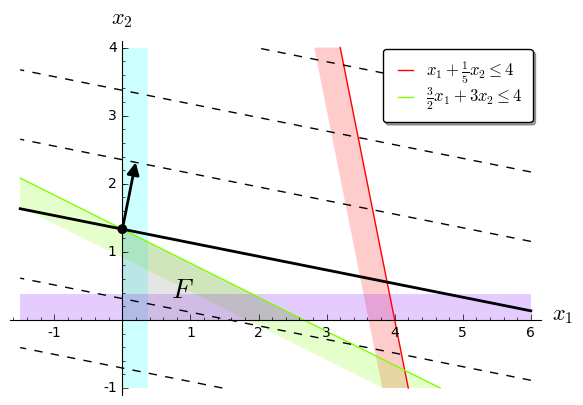

In [96]:
A = ([1, 0.2], [1.5, 3])
b = (4, 4)
c = (1, 5)
P = InteractiveLPProblem(A, b, c, ["x1", "x2"], problem_type="max", \
        constraint_type="<=", variable_type=">=")
pp = P.plot(); pp.show(figsize=6)

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Το Sage χώρισε το επίπεδο σε περιοχές ανάλογα με τις ανισότητες των περιορισμών του προβλήματος, οι οποίες συναληθεύουν στην τριγωνική περιοχή που συμβολίζει με $F$. Επιπλέον σχεδίασε ευθείες  παράλληλες (διακεκομμένες) με κλίση $-1/5$, όπου πάνω στις ευθείες αυτές η τιμή της συνάρτησης $x+5\,y$  που θέλουμε να μεγιστοποιήσουμε παραμένουν σταθερές και ίσες με $c$, $x+5\,y=c$. <br> Όσο απομακρυνόμαστε από την αρχή των αξόνων προς τα πάνω οι τιμές της $c$ μεγαλώνουν, οπότε το  σημείο τομής των ευθειών $x+5\,y=c$ (ευθεία με έντονο μαύρο) με τις ευθείες $1.5\,x+3\,y=4$ (ευθεία με πράσινο), και $x=0$ (ευθεία με τυρκουάζ), είναι το ζητούμενο σημείο στο οποίο η $x+5\,y$ παίρνει μέγιστη στην περιοχή $F$. Πραγματικά, από το σχήμα που μας έδωσε το Sage μπορούμε αμέσως να βρούμε ακριβώς το σημείο τομής και την μέγιστη τιμή που ψάχνουμε
</p>

In [97]:
var('x y c')
sol = solve([x+5*y==c,1.5*x+3*y==4,x==0],x,y,c,solution_dict=True); print sol

[{y: 4/3, x: 0, c: 20/3}]


In [98]:
print sol[0][c].n()

6.66666666666667


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Η μέγιστη τιμή της συνάρτησης $x+5\,y$ είναι $c=20/3$, στο σημείο $(x,y)=(0,4/3)$. Το Sage μπορεί να επιλύσει το πρόβλημα αριθμητικά χρησιμοποιώντας την μέθοδο simplex το οποίο είναι πολύ χρήσιμο όταν έχουμε να αντιμετωπίσουμε γραμμικά προβλήματα πολλών μεταβλητών. Με την παρακάτω εντολή μπορούμε να δούμε το αποτέλεσμα κάθε βήματος της μεθόδου simplex στην μορφή κειμένου και εξισώσεων $\mathrm{\LaTeX}$
</p>

In [99]:
P = P.standard_form()
P.run_simplex_method()

\begin{equation*}
\renewcommand{\arraystretch}{1.5} %notruncate
\begin{array}{|rcrcrcr|}
\hline
x_{3} \mspace{-6mu}&\mspace{-6mu} = \mspace{-6mu}&\mspace{-6mu} 4.00000000000000 \mspace{-6mu}&\mspace{-6mu} - \mspace{-6mu}&\color{green}\mspace{-6mu} x_{1} \mspace{-6mu}&\mspace{-6mu} - \mspace{-6mu}&\mspace{-6mu} 0.200000000000000 x_{2}\\
\color{red}x_{4} \mspace{-6mu}&\color{red}\mspace{-6mu} = \mspace{-6mu}&\color{red}\mspace{-6mu} 4.00000000000000 \mspace{-6mu}&\color{red}\mspace{-6mu} - \mspace{-6mu}&\color{blue}\mspace{-6mu} 1.50000000000000 x_{1} \mspace{-6mu}&\color{red}\mspace{-6mu} - \mspace{-6mu}&\color{red}\mspace{-6mu} 3.00000000000000 x_{2}\\
\hline
z \mspace{-6mu}&\mspace{-6mu} = \mspace{-6mu}&\mspace{-6mu} 0 \mspace{-6mu}&\mspace{-6mu} + \mspace{-6mu}&\color{green}\mspace{-6mu} x_{1} \mspace{-6mu}&\mspace{-6mu} + \mspace{-6mu}&\mspace{-6mu} 5.00000000000000 x_{2}\\
\hline
\end{array}
\end{equation*}
Entering: $x_{1}$. Leaving: $x_{4}$. 
\begin{equation*}
\renewcommand{\arraystretch}{1.5} %notruncate
\begin{array}{|rcrcrcr|}
\hline
x_{3} \mspace{-6mu}&\mspace{-6mu} = \mspace{-6mu}&\mspace{-6mu} 1.33333333333333 \mspace{-6mu}&\mspace{-6mu} + \mspace{-6mu}&\mspace{-6mu} 0.666666666666667 x_{4} \mspace{-6mu}&\mspace{-6mu} + \mspace{-6mu}&\color{green}\mspace{-6mu} 1.80000000000000 x_{2}\\
\color{red}x_{1} \mspace{-6mu}&\color{red}\mspace{-6mu} = \mspace{-6mu}&\color{red}\mspace{-6mu} 2.66666666666667 \mspace{-6mu}&\color{red}\mspace{-6mu} - \mspace{-6mu}&\color{red}\mspace{-6mu} 0.666666666666667 x_{4} \mspace{-6mu}&\color{red}\mspace{-6mu} - \mspace{-6mu}&\color{blue}\mspace{-6mu} 2.00000000000000 x_{2}\\
\hline
z \mspace{-6mu}&\mspace{-6mu} = \mspace{-6mu}&\mspace{-6mu} 2.66666666666667 \mspace{-6mu}&\mspace{-6mu} - \mspace{-6mu}&\mspace{-6mu} 0.666666666666667 x_{4} \mspace{-6mu}&\mspace{-6mu} + \mspace{-6mu}&\color{green}\mspace{-6mu} 3.00000000000000 x_{2}\\
\hline
\end{array}
\end{equation*}
Entering: $x_{2}$. Leaving: $x_{1}$. 
\begin{equation*}
\renewcommand{\arraystretch}{1.5} %notruncate
\begin{array}{|rcrcrcr|}
\hline
x_{3} \mspace{-6mu}&\mspace{-6mu} = \mspace{-6mu}&\mspace{-6mu} 3.73333333333333 \mspace{-6mu}&\mspace{-6mu} + \mspace{-6mu}&\mspace{-6mu} 0.0666666666666667 x_{4} \mspace{-6mu}&\mspace{-6mu} - \mspace{-6mu}&\mspace{-6mu} 0.900000000000000 x_{1}\\
x_{2} \mspace{-6mu}&\mspace{-6mu} = \mspace{-6mu}&\mspace{-6mu} 1.33333333333333 \mspace{-6mu}&\mspace{-6mu} - \mspace{-6mu}&\mspace{-6mu} 0.333333333333333 x_{4} \mspace{-6mu}&\mspace{-6mu} - \mspace{-6mu}&\mspace{-6mu} 0.500000000000000 x_{1}\\
\hline
z \mspace{-6mu}&\mspace{-6mu} = \mspace{-6mu}&\mspace{-6mu} 6.66666666666667 \mspace{-6mu}&\mspace{-6mu} - \mspace{-6mu}&\mspace{-6mu} 1.66666666666667 x_{4} \mspace{-6mu}&\mspace{-6mu} - \mspace{-6mu}&\mspace{-6mu} 1.50000000000000 x_{1}\\
\hline
\end{array}
\end{equation*}
The optimal value: $6.66666666666667$. An optimal solution: $\left(0.000000000000000,\,1.33333333333333\right)$.

### 6.4.2 Αδέσμευτα ακρότατα

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Ολοκληρώνουμε το κεφάλαιο αυτό παρουσιάζοντας την επίλυση ενός προβλήματος εύρεσης των ακροτάτων μιας συνάρτησης δυο μεταβλητών, χρησιμοποιώντας το Sage, τόσο συμβολικά όσο και αριθμητικά. <nr><br>
Θεωρούμε την συνάρτηση $f:\mathbb{R}^2 \rightarrow \mathbb{R}$ με τύπο <br>
$$ f(x,y) = (3+x-y^2)^2 + (x - 1)^2 + (y - 1)^2 \,.$$ <br>
Στο Sage ορίζουμε την συνάρτηση $f(x,y)$ και κάνουμε μια γραφική παράστασή της
</p>

In [100]:
var('x,y')
f(x,y) = (3+x-y^2)^2 + (x - 1)^2 + (y - 1)^2
pf = plot3d(f(x,y), (x, -2, 3), (y, -2, 3), adaptive=True, rgbcolor=(1,0.7,0), opacity=0.5)

<div class="imgContainer">
        <img src="Un.png" height="450" width="450"/>
            </div>

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Για να βρούμε τα υποψήφια τοπικά ακρότατα της $f$ στο $\mathbb{R}^2$ θα πρέπει να επιλύσουμε το σύστημα των εξισώσεων που προκύπτει από τον μηδενισμό της κλίσης $\nabla f = (f_x,f_y)$. Έχουμε
</p>

In [101]:
fx=f.diff(x); fy=f.diff(y);

In [102]:
eq1 = fx==0;
eq2 = fy==0;
print fx; print fy

(x, y) |--> -2*y^2 + 4*x + 4
(x, y) |--> 4*(y^2 - x - 3)*y + 2*y - 2


In [103]:
akro = solve([eq1, eq2],x,y,solution_dict=true) ; print akro

[{y: -0.3472963564632165, x: -0.9396925502562081}, {y: -1.532088888888889, x: 0.1736481782316083}, {y: 1.879385232208487, x: 0.7660444444444444}]


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Υπάρχουν τρία υποψήφια τοπικά ακρότατα. Για το πρώτο σημείο στην λίστα akro έχουμε ότι η Hessian στο σημείο είναι αρνητική
</p>

In [104]:
D = det(f.diff().diff())

In [105]:
print D(x=akro[0][x],y=akro[0][y])

-21.105246901096653


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Άρα από γνωστό μας κριτήριο το σημείο αυτό δεν είναι ούτε μέγιστο ούτε ελάχιστο, είναι σαγματικό. Για το δεύτερο και τρίτο σημείο έχουμε ότι οι αντίστοιχες τιμές της Hessian και η δεύτερη παράγωγος $f_{xx}$ στα σημεία αυτά είναι
</p>

In [106]:
print D(x=akro[1][x],y=akro[1][y])

32.335112778911565


In [107]:
print f.diff(x,2)(x=akro[1][x],y=akro[1][y])

4


In [108]:
print D(x=akro[2][x],y=akro[2][y])

60.770132122276046


In [109]:
print f.diff(x,2)(x=akro[2][x],y=akro[2][y])

4


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Οπότε από το κριτήριο χαρακτηρισμού τοπικών ακροτάτων τα σημεία αυτά είναι τοπικά ελάχιστα. Απεικονίζουμε και τα τρία σημεία πάνω στην επιφάνεια για να έχουμε μια καλύτερη εποπτεία που ακριβώς βρίσκονται. Με κόκκινο χρώμα απεικονίζουμε το σαγματικό σημείο ενώ με μαύρο τα τοπικά ελάχιστα.
</p>

<div class="imgContainer">
        <img src="minimy.png" height="400" width="400"/>
            </div>

<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Εναλλακτικά, μπορούμε να λύσουμε το σύστημα των εξισώσεων κατασκευάζοντας μια βάση <strong>Gröbner</strong>, ως εξής
</p>

In [110]:
PR.<x,y> = PolynomialRing(QQ, order='lex')
print PR
q1 = PR(eq1); q2 = PR(eq2);
print q1; print q2;

Multivariate Polynomial Ring in x, y over Rational Field
4*x - 2*y^2 + 4
-4*x*y + 4*y^3 - 10*y - 2


In [111]:
qs = [q1, q2]
I = Ideal(qs)
print I

Ideal (4*x - 2*y^2 + 4, -4*x*y + 4*y^3 - 10*y - 2) of Multivariate Polynomial Ring in x, y over Rational Field


In [112]:
B = I.groebner_basis()
print B

[x - 1/2*y^2 + 1, y^3 - 3*y - 1]


In [113]:
R = RealField(30*log(10,2))

In [114]:
akroGroebner = I.variety(R); print akroGroebner

[{y: -1.5320888862379560704047853011, x: 0.17364817766693034885171662677}, {y: -0.34729635533386069770343325354, x: -0.93969262078590838405410927732}, {y: 1.8793852415718167681082185546, x: 0.76604444311897803520239265056}]


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
όπου χρησιμοποιήσαμε ένα σώμα πραγματικών με μεγάλη ακρίβεια. <br><br> Ας υποθέσουμε τώρα ότι δεν ήταν εφικτή η συμβολική επίλυση του συστήματος των εξισώσεων, όμως θέλαμε να έχουμε μια αριθμητική εκτίμηση των τοπικών ελαχίστων. Για τέτοιες περιπτώσεις το Sage μας παρέχει μέσω της εντολής <code>minimize</code> έναν αλγόριθμο που εκτελεί αριθμητική εύρεση των ελαχίστων της $f(x,y)$, όπου όμως θα πρέπει να το τροφοδοτήσουμε με μια αρχική εκτίμηση. Για το συγκεκριμένο παράδειγμα έχουμε
</p>

In [115]:
p = minimize(f, x0=[-1, -1])
print 'minimum at', p, 'with value', f(p[0], p[1])

Optimization terminated successfully.
         Current function value: 7.777189
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
minimum at (0.17364806791014437, -1.5320886803733234) with value 7.777188796356398


In [116]:
p = minimize(f, x0=[1, 1])
print 'minimum at', p, 'with value', f(p[0], p[1])

Optimization terminated successfully.
         Current function value: 0.882789
         Iterations: 6
         Function evaluations: 10
         Gradient evaluations: 10
minimum at (0.7660444433518, 1.87938524199908) with value 0.8827888082853408


<p> <font style="font-family:Dejavu Serif;FONT-SIZE:15px;LINE-HEIGHT:25px;"> 
Παρατηρούμε ότι οι αριθμητικές προσεγγίσεις των ελαχίστων συμφωνούν με τα ακριβή αποτελέσματα που πήραμε με την μέθοδο των βάσεων Gröbner στα πρώτα 6 έως 8 δεκαδικά ψηφία.
</p>